# Definição do Problema

Temos uma base de dados correspondente a extração de informações de imóveis na cidade de Melbourne. Vamos realizar uma limpeza e análise exploratória na base de dados imobiliários públicos na cidade de Melbourn, Austrália. Devemos implementar um sistema que de posse das features do dataset limpo possa prever o preço dos imóveis. 


# Coleta dos dados

Obtemos esses dados no [Kaggle](https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot?select=melb_data.csv).

Esta base foi extraída dos dados publicos disponíveis no site [Domain.com.au](http://Domain.com.au).

## Descrição das colunas


1. **Rooms**: Número de quartos  


2. **Price**: Preço em dólares  
3. **Method**: S - imóvel vendido; SP - imóvel vendido anteriormente; PI - imóvel não vendido; PN - vendido anteriormente e não divulgado; SN - vendido e não divulgado; NB - sem oferta; VB - oferta do vendedor; W - retirado antes do leilão; SA - vendido após o leilão; SS - vendido após o leilão, preço não divulgado. N/A - preço ou maior oferta não disponível.  
4. **Type**: br - quarto(s); h - casa, chalé, vila, semi, terraço; u - unidade, duplex; t - casa de cidade; terreno de desenvolvimento; o res - outros residenciais.  
5. **SellerG**: Agente imobiliário  
6. **Date**: Data da venda  
7. **Distance**: Distância do centro da cidade  
8. **Regionname**: Região geral (Oeste, Noroeste, Norte, Nordeste ... etc)  
9. **Propertycount**: Número de propriedades existentes no subúrbio.  
10. **Bedroom2**: Número de quartos (obtido de outra fonte)  
11. **Bathroom**: Número de banheiros  
12. **Car**: Número de vagas de estacionamento  
13. **Landsize**: Tamanho do terreno  
14. **BuildingArea**: Tamanho da construção  
15. **CouncilArea**: Conselho governante para a área  


# Importando Pacotes

In [8]:
import pandas as pd
import numpy as np
import scipy.stats 
import os
import seaborn as sns
import matplotlib.pyplot as plt

#from branca.colormap import linear
pd.set_option('display.max_columns', None)

%matplotlib inline

Remove warnings

In [9]:
import warnings
warnings.filterwarnings('ignore')

# Carrega Base de dados

In [10]:
cols_to_use = ['Rooms','Price','Method','Date','Address','Distance','Propertycount','Bedroom2',
                'Bathroom','Car','Landsize','BuildingArea','YearBuilt','Lattitude',
                'Longtitude']
base = pd.read_csv("../data/melb_data.csv", usecols=cols_to_use)
print(base.shape)
base.head()

(13580, 15)


,Address,Rooms,Price,Method,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,85 Turner St,2,1480000.0,S,3/12/2016,2.5,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,4019.0
1,25 Bloomburg St,2,1035000.0,S,4/02/2016,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
2,5 Charles St,3,1465000.0,SP,4/03/2017,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0
3,40 Federation La,3,850000.0,PI,4/03/2017,2.5,3.0,2.0,1.0,94.0,NaN,NaN,-37.7969,144.9969,4019.0
4,55a Park St,4,1600000.0,VB,4/06/2016,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0


Extraímos as colunas que serão utilizadas neste projeto e verificamos o tamanho da base. Esta informação nos é útil para comparar a quatidade de valores totais com nulos ao longo da análise.

# Limpeza de dados

In [11]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Address        13580 non-null  object 
 1   Rooms          13580 non-null  int64  
 2   Price          13580 non-null  float64
 3   Method         13580 non-null  object 
 4   Date           13580 non-null  object 
 5   Distance       13580 non-null  float64
 6   Bedroom2       13580 non-null  float64
 7   Bathroom       13580 non-null  float64
 8   Car            13518 non-null  float64
 9   Landsize       13580 non-null  float64
 10  BuildingArea   7130 non-null   float64
 11  YearBuilt      8205 non-null   float64
 12  Lattitude      13580 non-null  float64
 13  Longtitude     13580 non-null  float64
 14  Propertycount  13580 non-null  float64
dtypes: float64(11), int64(1), object(3)
memory usage: 1.6+ MB


A base de dados contém uma mistura de variáveis categóricas e numéricas. Algumas variáveis têm missing values. A coluna data não está no formato tipo datetime. Vamos ajustar.

In [12]:
base['Date'] = pd.to_datetime(base['Date'], infer_datetime_format=True)
base['Date'].head()

0   2016-03-12
1   2016-04-02
2   2017-04-03
3   2017-04-03
4   2016-04-06
Name: Date, dtype: datetime64[ns]

## Visão estatística dos dados

In [13]:
base.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


A maioria das variáveis parece ter valores normais. No entanto, vale a pena dar uma olhada em algumas variáveis:
- A faixa de preço de uma casa é bastante grande, entre 85.000 e 9 milhões de dólares.
- A distância até o centro da cidade às vezes é 0 (imóvel no centro).
- Algumas casas não têm quarto, nem banheiro.
- O tamanho do terreno e a área de construção são zero para algumas casas (talvez sejam apartamentos?). Parece haver alguns outliers nessas variáveis.
- O YearBuilt mínimo é 1196, provavelmente um erro de entrada de dados.

### Histograma dos dados

Abaixo o plot dos histogramas dos valores das variáveis da base plotados contra sua quantidade total. Extraímos alguns insights.

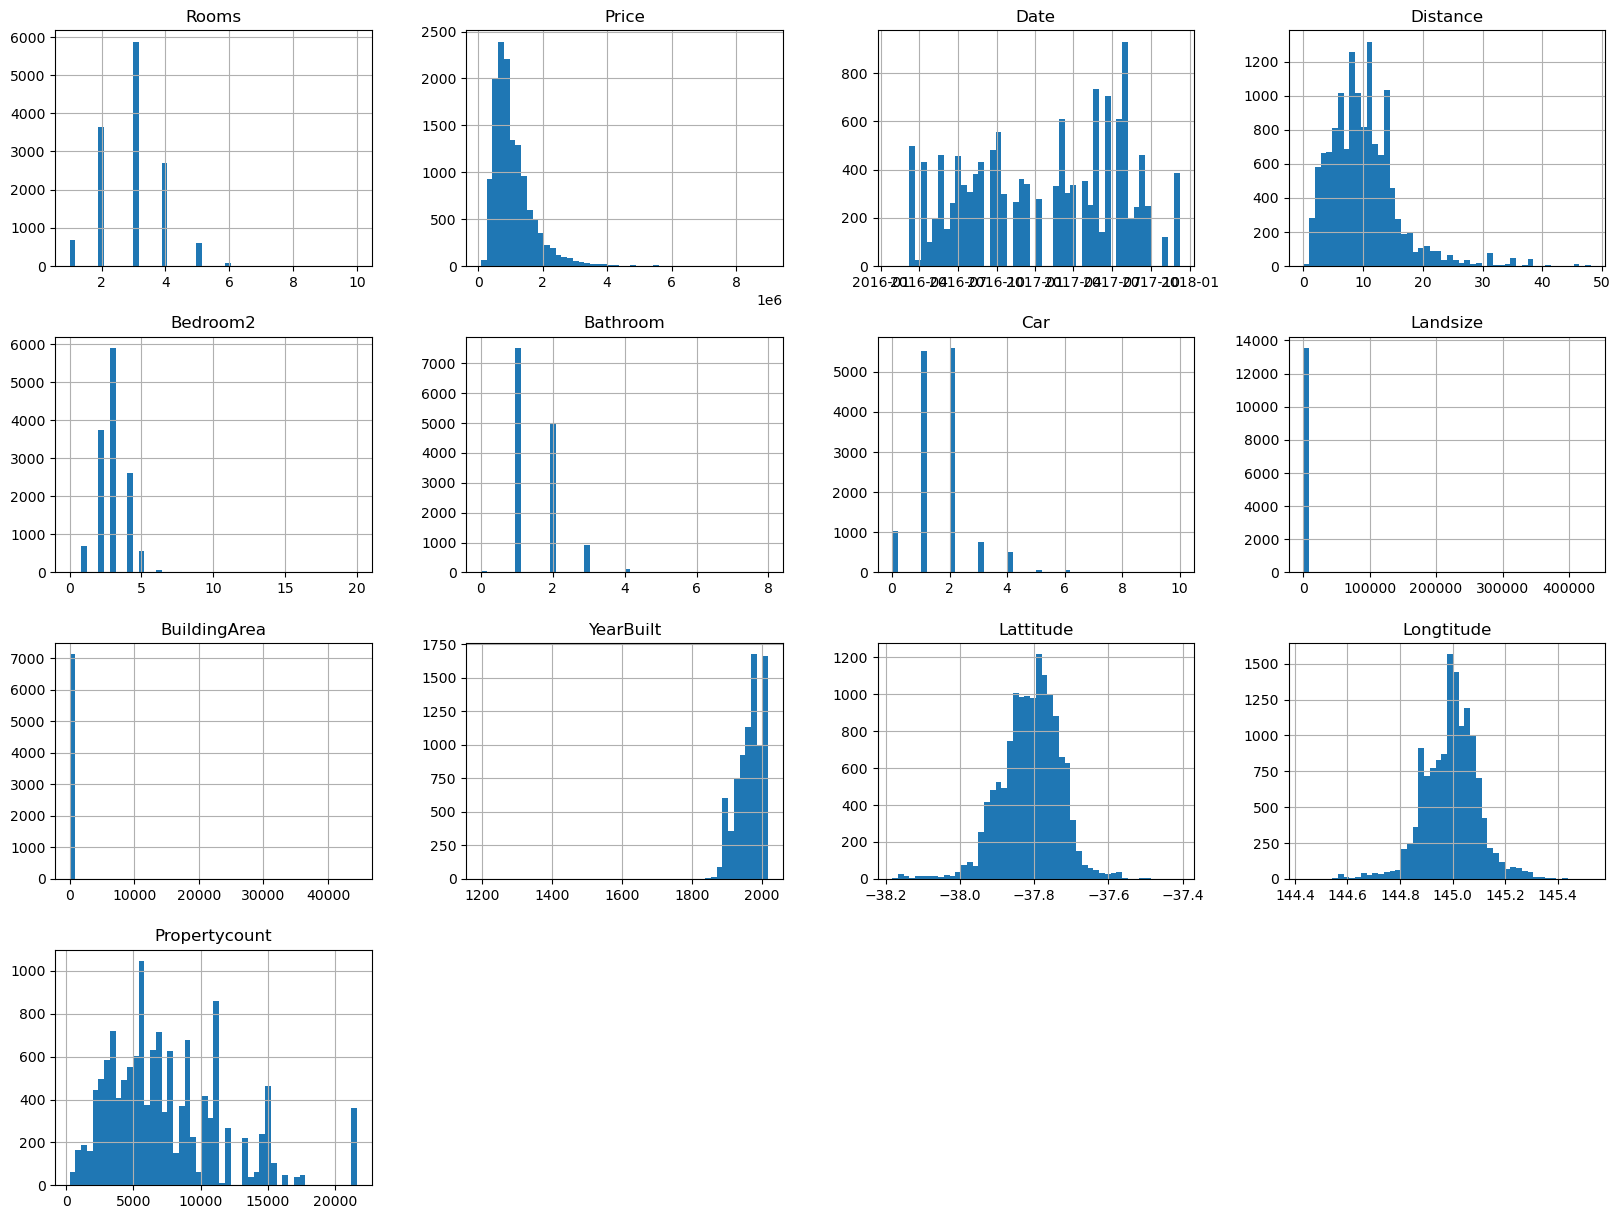

In [14]:
base.hist(bins=50, figsize=(20,15))
plt.show()

In [15]:
# Número de nulos nos valores de Área construida

building_null = base["BuildingArea"].isnull()
building_null.value_counts()[1]/building_null.count() *100

47.49631811487481

count    7058.000000
mean      139.231613
std        70.609664
min         0.000000
25%        92.000000
50%       125.000000
75%       171.000000
max       465.000000
Name: BuildingArea, dtype: float64

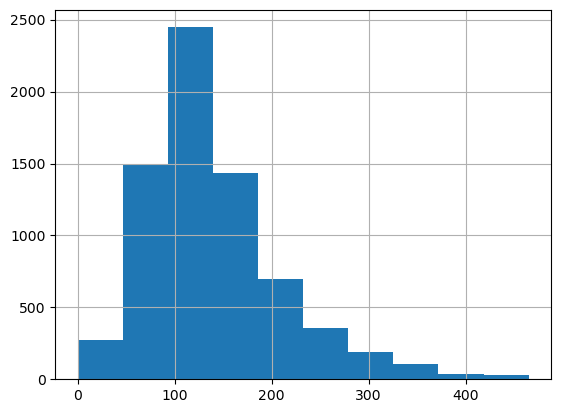

In [16]:
# Histograma de área construída dropando os valores nulos e valores abaixo do percentil 99

building_base = base.dropna(subset=["BuildingArea"])
building_99p = building_base["BuildingArea"] < np.percentile(building_base["BuildingArea"], 99)

building_base[building_99p].BuildingArea.hist()
building_base[building_99p].BuildingArea.describe()

Apesar de haver uma distribuição tratável no caso acima, o numero de valores nulos chegando a metade dos valores da base torna impraticavél a substituição da coluna acima.

In [17]:
# Porcentagem de casas a menos de 20Km do centro da cidade

print(base[base["Distance"]<20].Distance.count()/base["Distance"].count() *100)

94.42562592047128


In [18]:
# Tamanho do terreno nulo (Landsize)

base[base.Landsize == 0].Landsize.count()/base.Landsize.count() *100

14.278350515463917

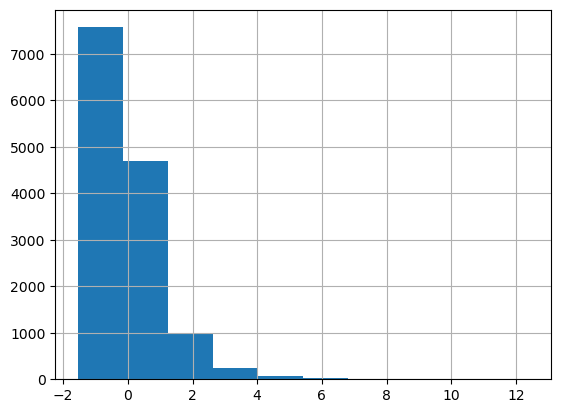

In [19]:
# Preço renormalziado das casas

base.Price.apply(lambda x: (x - base.Price.mean())/(base.Price.std())).hist()
plt.show()

Apesar da renormalização dos valores dos imovéis o skew continua extremamente positivo o que inviabiliza muito claramente um teste de normalidade dos preços, assim, iremos continuar considerando a relação entre outras variáveis com o preço.

Algumas coisas a serem observadas nos histogramas:

- a área de construção é nulo para muitas casas (cerca de 50%)
- Mais de 90% dos imóveis está dentro de um raio de 20 quilômetros do centro da cidade
- o tamanho do terreno é zero para cerca de 14% das casas
- o preço da casa está um pouco distorcido (skew)

## Dados Geográficos

Vamos usar um gráfico de dispersão para plotar a latitude e a longitude nos dados.

Devido a alguns outliers, não há muita variação na cor das casas no mapa. Por esse motivo, omitimos o 1% superior dos dados para construir o gráfico. Isso dá mais informações sobre onde as casas mais caras estão localizadas.

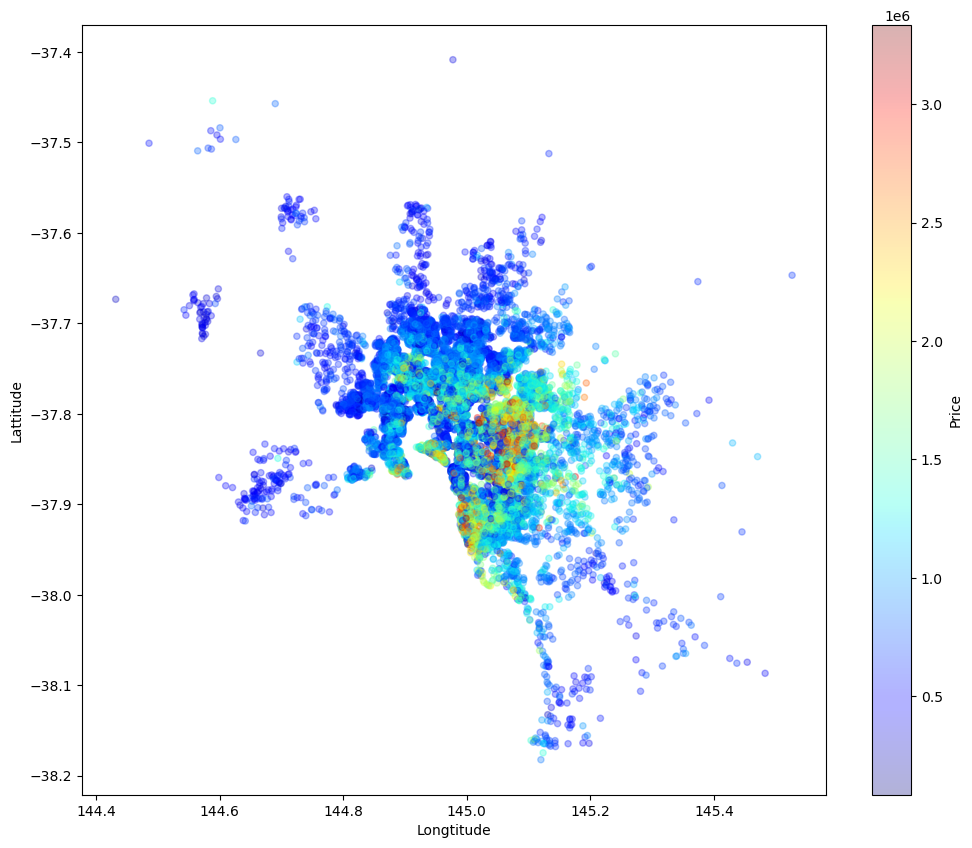

In [20]:
bottom_99p = base.Price < np.percentile(base.Price, 99)

scatter_plot = base[bottom_99p].plot(kind='scatter', x='Longtitude', y='Lattitude', 
                      alpha=0.3, figsize=(12,10)
                    ,c='Price', cmap=plt.get_cmap('jet'), colorbar=True)

#uso do contextility para colocar mapa no backgorund do scatterplot
# ctx.add_basemap(scatter_plot, crs='EPSG:4326', source=ctx.providers.Stamen.TonerLite)


Vimos que a Latitude influência no preço das casas, quanto mais afastados da faixa que contém o centro, mais baratos ficam os imóveis. Abaixo utilizamos um mapa interativo com os valores de venda e endereço em popup.

Verificamos que os imóveis com mais próximidade da região litorânea da cidade, tem uma valorização no preço maior no período contemplado na base.

## Estudo da Sazonalidade

In [21]:
## Criando a coluna de Mes da Venda

month = base["Date"].dt.month
base["Month"] = month
base.head()

,Address,Rooms,Price,Method,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Month
0,85 Turner St,2,1480000.0,S,2016-03-12,2.5,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,4019.0,3
1,25 Bloomburg St,2,1035000.0,S,2016-04-02,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0,4
2,5 Charles St,3,1465000.0,SP,2017-04-03,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0,4
3,40 Federation La,3,850000.0,PI,2017-04-03,2.5,3.0,2.0,1.0,94.0,NaN,NaN,-37.7969,144.9969,4019.0,4
4,55a Park St,4,1600000.0,VB,2016-04-06,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0,4


Histograma da quantidade de casas pelo mês vendido

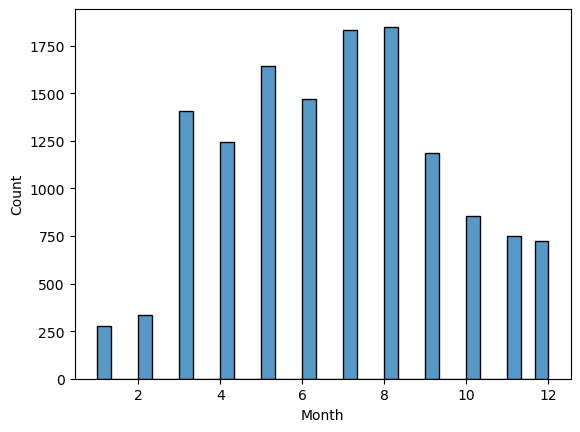

In [22]:
sns.histplot(data=base, x="Month")
plt.show()

Vemos que a quantidade de casas vendidas tende a aumentar no meio do ano e diminui no comeco e final do ano. Vamos agora obervar a evolução do Preço do imóvel de acordo com o mês do ano.

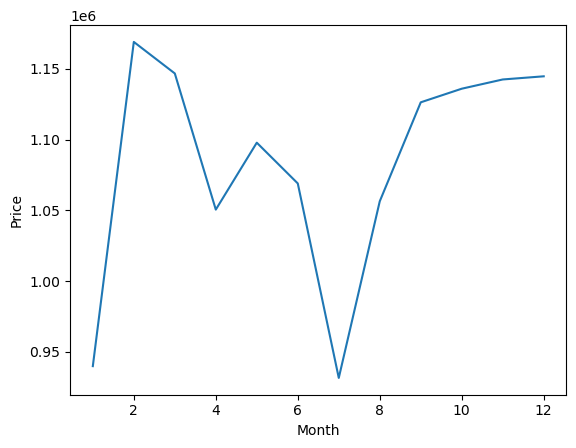

In [23]:
## Vamos calcular o preco total de venda em cada mes em todos os anos

sns.lineplot(data=base, x="Month", y="Price", ci=None)
plt.show()

Diferentemente da quantidade de casas vendidas, a evolucao do preco tem um comportamento mais flutuante ao longo do ano.

In [24]:
# Data da menor e maior valor de um imóvel

filtro = (base.Price == base.Price.min()) | (base.Price == base.Price.max())
base.loc[filtro, ["Month", "Date","Price"]]

,Month,Date,Price
2652,3,2016-03-09,85000.0
12094,7,2017-07-29,9000000.0


Descobrimos a data do menor e maior valor. Observamos que se vende um número maior de casas entre mês 6 e 9 (Junho e Setembro), mas com preço abaixo da média neste mesmo período. Qual a localização destas casas?

In [25]:
selected_months = (base["Month"] >=6) & (base["Month"] <= 9)
#selected_months = (base["Month"] == 7)
feb = base["Month"] == 2
base[selected_months].Distance.median()

10.1

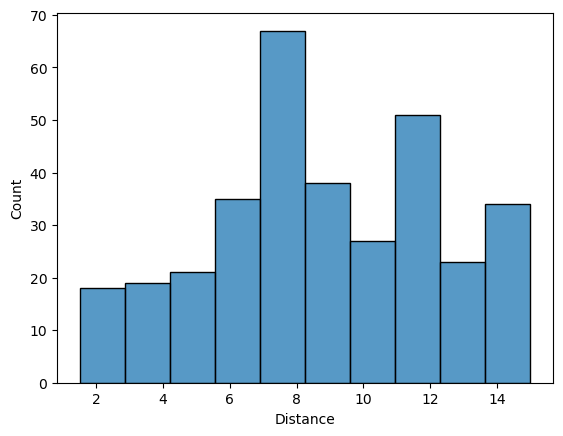

In [26]:
sns.histplot(data=base[feb], x="Distance")
plt.show()

No mes de fevereiro em que temos um valor maior vendendo menos casas, temos uma distancia menor do centro em comparação ao caso anterior.

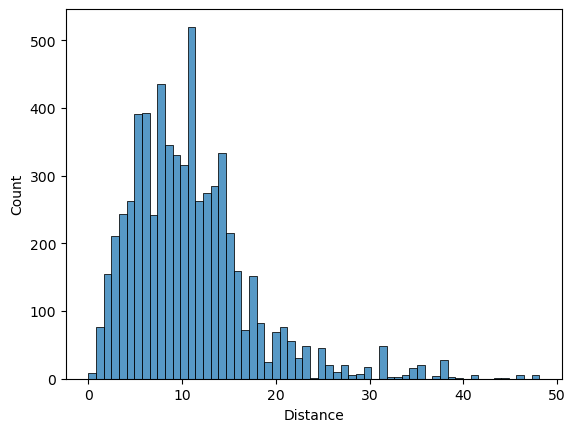

In [27]:
sns.histplot(data=base[selected_months], x="Distance")
plt.show()

Número de casas vendidas nos meses em seleção não altera de modo significativo em relação ao total. Significa que não há mudança na distribuição mesmo no período selecionado de maior venda de casas. Comparar as medianas nos dois casos corrobora o resultado do gráfico.

## Correlações

Com o coeficiente de correlação padrão podemos analisar se existe uma relação linear entre o Preço e as demais variáveis.

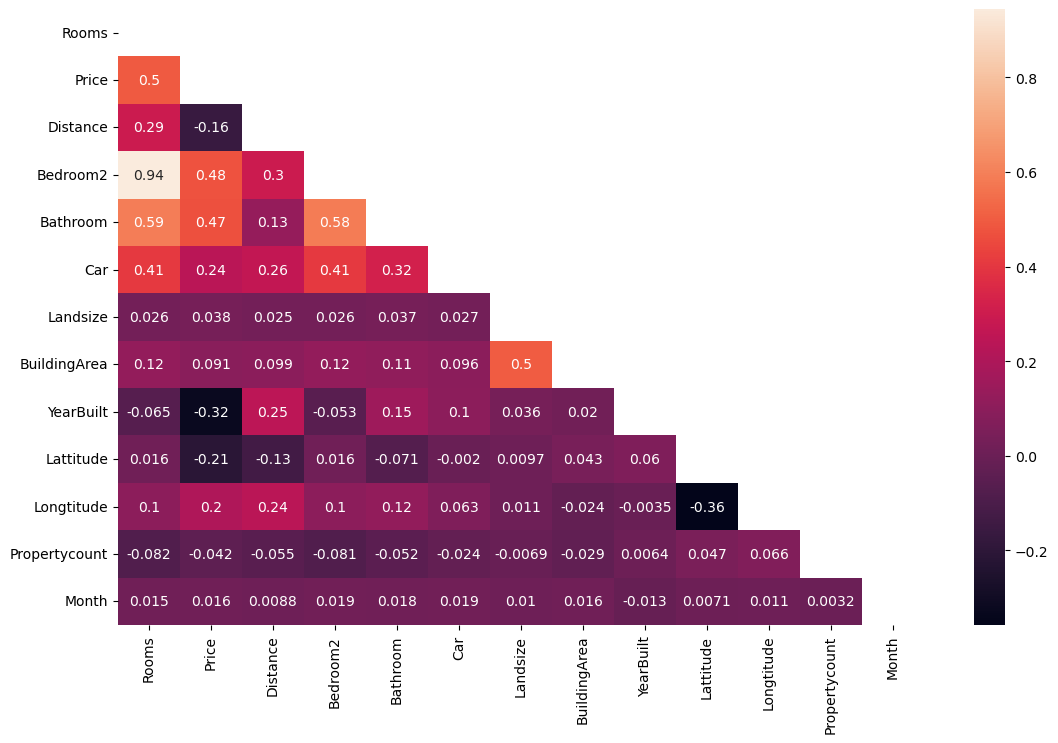

In [28]:
plt.figure(figsize=(13, 8))
corr= base.corr()

# Plot do triangulo superior da matriz de correlação
matrix = np.triu(corr)

# usando a matriz superior como uma mascara
sns.heatmap(corr, annot=True, mask=matrix)
plt.show()

Como podemos ver, existe uma relação linear justa entre o Preço e o número de Quartos. Quarto2 e Banheiro também estão correlacionados com Preço, mas provavelmente também estão correlacionados com Quartos. O número de parques de estacionamento também tem um impacto positivo no Preço. Como vimos no gráfico de dispersão das coordenadas geográficas, as casas no leste de Melbourne (ou seja, longitude mais alta) são mais caras.

Casas mais próximas do Central Business District (ou seja, distância menor) são mais caras. Em segundo lugar, quanto mais antiga a casa (ou seja, menor ano de construção), maior o preço.

Vemos que existe uma correlação quase perfeita de Rooms com Bedroom2. Como elas medem a mesma informacao podemos trabalhar com apenas uma delas.

# Selecionando a Base

In [29]:
base.shape[0]

13580

In [30]:
missing_perc = (base.isnull().sum() / base.shape[0]) * 100
missing_perc

Address           0.000000
Rooms             0.000000
Price             0.000000
Method            0.000000
Date              0.000000
Distance          0.000000
Bedroom2          0.000000
Bathroom          0.000000
Car               0.456554
Landsize          0.000000
BuildingArea     47.496318
YearBuilt        39.580265
Lattitude         0.000000
Longtitude        0.000000
Propertycount     0.000000
Month             0.000000
dtype: float64

Percebemos um valor alto de valores nulos em algumas colunas, iremos dropar todas as colunas com >20% de valores nulos.

In [31]:
mask = missing_perc < 20
cols = missing_perc[mask].index.tolist()

base_no_missing = base[cols]
print(base_no_missing.shape)
base_no_missing.head()

(13580, 14)


,Address,Rooms,Price,Method,Date,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Month
0,85 Turner St,2,1480000.0,S,2016-03-12,2.5,2.0,1.0,1.0,202.0,-37.7996,144.9984,4019.0,3
1,25 Bloomburg St,2,1035000.0,S,2016-04-02,2.5,2.0,1.0,0.0,156.0,-37.8079,144.9934,4019.0,4
2,5 Charles St,3,1465000.0,SP,2017-04-03,2.5,3.0,2.0,0.0,134.0,-37.8093,144.9944,4019.0,4
3,40 Federation La,3,850000.0,PI,2017-04-03,2.5,3.0,2.0,1.0,94.0,-37.7969,144.9969,4019.0,4
4,55a Park St,4,1600000.0,VB,2016-04-06,2.5,3.0,1.0,2.0,120.0,-37.8072,144.9941,4019.0,4


No caso das colunas que contém valores nulos em numero relativo menor que os acima, escolhemos por substituir os valores nulos pela moda (valor mais comum).

In [32]:
mode_car = base_no_missing["Car"].mode()[0]

base_no_missing["Car"].fillna(mode_car, inplace=True)
base_no_missing.head()

,Address,Rooms,Price,Method,Date,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Month
0,85 Turner St,2,1480000.0,S,2016-03-12,2.5,2.0,1.0,1.0,202.0,-37.7996,144.9984,4019.0,3
1,25 Bloomburg St,2,1035000.0,S,2016-04-02,2.5,2.0,1.0,0.0,156.0,-37.8079,144.9934,4019.0,4
2,5 Charles St,3,1465000.0,SP,2017-04-03,2.5,3.0,2.0,0.0,134.0,-37.8093,144.9944,4019.0,4
3,40 Federation La,3,850000.0,PI,2017-04-03,2.5,3.0,2.0,1.0,94.0,-37.7969,144.9969,4019.0,4
4,55a Park St,4,1600000.0,VB,2016-04-06,2.5,3.0,1.0,2.0,120.0,-37.8072,144.9941,4019.0,4


Por fim, verificamos a base nova com valores tratados e salvamos a base tratada no formato csv.

In [33]:
base_no_missing_new = base_no_missing[['Rooms', 'Price','Distance', 'Bathroom',
                                        'Car', 'Landsize', 'Lattitude', 'Longtitude', 
                                        'Propertycount', 'Month']]
print(base_no_missing_new.shape)
base_no_missing_new.head()

(13580, 10)


,Rooms,Price,Distance,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Month
0,2,1480000.0,2.5,1.0,1.0,202.0,-37.7996,144.9984,4019.0,3
1,2,1035000.0,2.5,1.0,0.0,156.0,-37.8079,144.9934,4019.0,4
2,3,1465000.0,2.5,2.0,0.0,134.0,-37.8093,144.9944,4019.0,4
3,3,850000.0,2.5,2.0,1.0,94.0,-37.7969,144.9969,4019.0,4
4,4,1600000.0,2.5,1.0,2.0,120.0,-37.8072,144.9941,4019.0,4


Verificamos novamente por valores nulos

In [34]:
missing_perc = (base_no_missing_new.isnull().sum() / base_no_missing_new.shape[0]) * 100
missing_perc

Rooms            0.0
Price            0.0
Distance         0.0
Bathroom         0.0
Car              0.0
Landsize         0.0
Lattitude        0.0
Longtitude       0.0
Propertycount    0.0
Month            0.0
dtype: float64

Salvando em formato csv

In [37]:
base_no_missing_new.to_csv("../data/base_tratada.csv", sep=";", index=False)